In [2]:
import numpy as np
import pandas as pd


In [18]:
data = pd.read_csv("/content/austin_weather.csv")
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [19]:
data = data.drop(["Events", "Date", "SeaLevelPressureAvgInches"], axis = 1)

In [20]:
data = data.replace("T", 0.0)
data = data.replace("-", 0.0)
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,29.87,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.41,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.3,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.27,10,10,7,10,2,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.88,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.81,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.79,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.87,10,10,10,13,4,20,0


In [21]:
data.to_csv("austine_weather_final.csv")

In [22]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [23]:
data = pd.read_csv("austine_weather_final.csv")
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [24]:
x = data.drop(['PrecipitationSumInches'], axis = 1)

In [26]:
y = data["PrecipitationSumInches"]

In [27]:
y = y.values.reshape(-1,1)
y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [37]:
day_index = 798
days = [i for i in range(y.size)]


In [32]:
clf = LinearRegression()
clf.fit(x,y)

LinearRegression()

The precipitation trend graph;


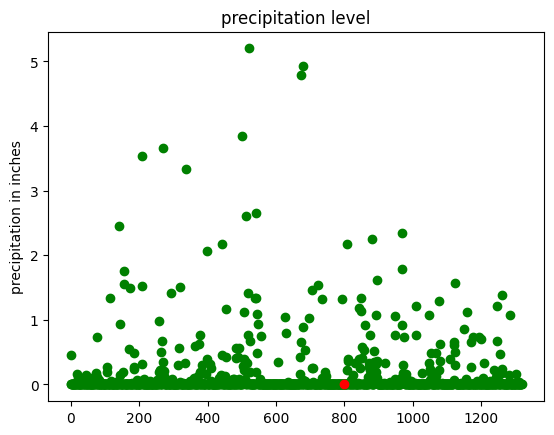

In [40]:
print("The precipitation trend graph;")
plt.scatter(days, y, color = "g")
plt.scatter(days[day_index], y[day_index], color='r')
plt.title("precipitation level")
plt.ylabel("days")
plt.ylabel("precipitation in inches")
plt.show()
x_vis = x.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureHighInches', 'VisibilityAvgMiles', 'WindAvgMPH' ])

The precipitation vs attributes trend graph:


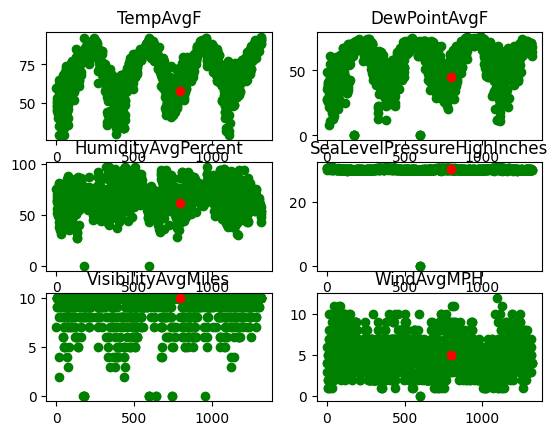

In [41]:
print("The precipitation vs attributes trend graph:")

for i in range(x_vis.columns.size):
  plt.subplot(3,2,i+1)
  plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color="g")
  plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color = 'r')
  plt.title(x_vis.columns.values[i])
plt.show()